# Import 

In [88]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from wordcloud import WordCloud
%matplotlib inline

sns.set(style="whitegrid", palette="Set1")
plt.rcParams["figure.figsize"] = (12, 6)

In [89]:
df = pd.read_excel('../../data/new_data/raw/Truth_Seeker_Model_Dataset_With_TimeStamps 1.xlsx', index_col=0)
df.head()

,author,statement,target,BinaryNumTarget,manual_keywords,tweet,5_label_majority_answer,3_label_majority_answer,timestamp
0,D.L. Davis,End of eviction moratorium means millions of A...,1.0,1.0,"Americans, eviction moratorium",@POTUS Biden Blunders - 6 Month Update\n\nInfl...,Mostly Agree,Agree,Thu Sep 09 23:58:53 +0000 2021
1,D.L. Davis,End of eviction moratorium means millions of A...,1.0,1.0,"Americans, eviction moratorium",@S0SickRick @Stairmaster_ @6d6f636869 Not as m...,NO MAJORITY,Agree,Mon Aug 30 18:58:09 +0000 2021
2,D.L. Davis,End of eviction moratorium means millions of A...,1.0,1.0,"Americans, eviction moratorium",THE SUPREME COURT is siding with super rich pr...,Agree,Agree,Fri Aug 27 09:53:44 +0000 2021
3,D.L. Davis,End of eviction moratorium means millions of A...,1.0,1.0,"Americans, eviction moratorium",@POTUS Biden Blunders\n\nBroken campaign promi...,Mostly Agree,Agree,Tue Oct 05 20:37:14 +0000 2021
4,D.L. Davis,End of eviction moratorium means millions of A...,1.0,1.0,"Americans, eviction moratorium",@OhComfy I agree. The confluence of events rig...,Agree,Agree,Fri Aug 27 10:58:24 +0000 2021


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 134203 entries, 0 to 134197
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   author                   134202 non-null  object 
 1   statement                134202 non-null  object 
 2   target                   134198 non-null  float64
 3   BinaryNumTarget          134198 non-null  float64
 4   manual_keywords          134198 non-null  object 
 5   tweet                    134197 non-null  object 
 6   5_label_majority_answer  134194 non-null  object 
 7   3_label_majority_answer  134194 non-null  object 
 8   timestamp                134194 non-null  object 
dtypes: float64(2), object(7)
memory usage: 10.2+ MB


In [91]:
df.describe()

,target,BinaryNumTarget
count,134198.000000,134198.000000
mean,0.513644,0.513644
std,0.499816,0.499816
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [92]:
df.isna().sum()

author                     1
statement                  1
target                     5
BinaryNumTarget            5
manual_keywords            5
tweet                      6
5_label_majority_answer    9
3_label_majority_answer    9
timestamp                  9
dtype: int64

In [93]:
df = df.dropna(axis=0)
df.isna().sum()

author                     0
statement                  0
target                     0
BinaryNumTarget            0
manual_keywords            0
tweet                      0
5_label_majority_answer    0
3_label_majority_answer    0
timestamp                  0
dtype: int64

In [94]:
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%a %b %d %H:%M:%S %z %Y',errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 134193 entries, 0 to 134197
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype              
---  ------                   --------------   -----              
 0   author                   134193 non-null  object             
 1   statement                134193 non-null  object             
 2   target                   134193 non-null  float64            
 3   BinaryNumTarget          134193 non-null  float64            
 4   manual_keywords          134193 non-null  object             
 5   tweet                    134193 non-null  object             
 6   5_label_majority_answer  134193 non-null  object             
 7   3_label_majority_answer  134193 non-null  object             
 8   timestamp                134193 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), float64(2), object(6)
memory usage: 10.2+ MB


In [95]:
df['full_text'] = df['statement'] + " " + df['tweet']

In [96]:
df['word_count'] = df['full_text'].apply(lambda x: len(x.split()))

In [97]:
df['date'] = df['timestamp'].dt.date
df['month'] = df['timestamp'].dt.month
df['weekday'] = df['timestamp'].dt.weekday
df = df.drop('timestamp',axis =1)

In [98]:
df.head()

,author,statement,target,BinaryNumTarget,manual_keywords,tweet,5_label_majority_answer,3_label_majority_answer,full_text,word_count,date,month,weekday
0,D.L. Davis,End of eviction moratorium means millions of A...,1.0,1.0,"Americans, eviction moratorium",@POTUS Biden Blunders - 6 Month Update\n\nInfl...,Mostly Agree,Agree,End of eviction moratorium means millions of A...,58,2021-09-09,9,3
1,D.L. Davis,End of eviction moratorium means millions of A...,1.0,1.0,"Americans, eviction moratorium",@S0SickRick @Stairmaster_ @6d6f636869 Not as m...,NO MAJORITY,Agree,End of eviction moratorium means millions of A...,62,2021-08-30,8,0
2,D.L. Davis,End of eviction moratorium means millions of A...,1.0,1.0,"Americans, eviction moratorium",THE SUPREME COURT is siding with super rich pr...,Agree,Agree,End of eviction moratorium means millions of A...,53,2021-08-27,8,4
3,D.L. Davis,End of eviction moratorium means millions of A...,1.0,1.0,"Americans, eviction moratorium",@POTUS Biden Blunders\n\nBroken campaign promi...,Mostly Agree,Agree,End of eviction moratorium means millions of A...,55,2021-10-05,10,1
4,D.L. Davis,End of eviction moratorium means millions of A...,1.0,1.0,"Americans, eviction moratorium",@OhComfy I agree. The confluence of events rig...,Agree,Agree,End of eviction moratorium means millions of A...,53,2021-08-27,8,4


# EDA

## 1. Rozkład klas

Procent prawdziwych newsów 51.36%
Procent fałszywych newsów 48.64%


C:\Users\ignat\AppData\Local\Temp\ipykernel_29032\4001334437.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df,palette='coolwarm')


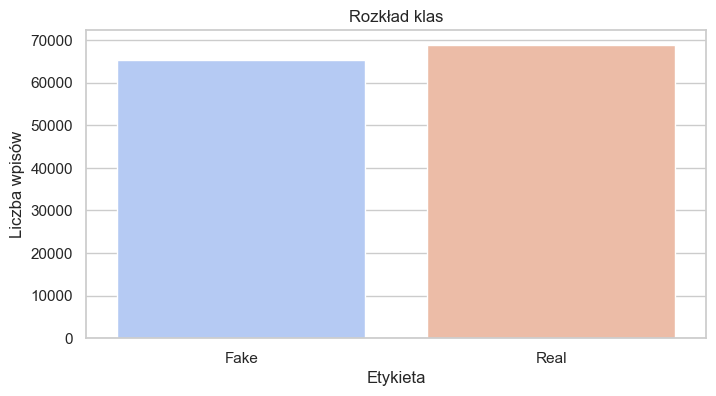

In [99]:
print(f"Procent prawdziwych newsów {sum(df['target']==1)*100/df.shape[0]:.2f}%")
print(f"Procent fałszywych newsów {sum(df['target']==0)*100/df.shape[0]:.2f}%")

plt.figure(figsize=(8,4))
sns.countplot(x='target', data=df,palette='coolwarm')
plt.title('Rozkład klas')
plt.xticks([0, 1], ['Fake', 'Real'])
plt.xlabel('Etykieta')
plt.ylabel('Liczba wpisów')
plt.show()

In [109]:
df[df['target']==1][['statement','tweet']].iloc[654]

statement    The Trump administration worked to free 5,000 ...
tweet        @JudiciaryGOP @Jim_Jordan This is all Republic...
Name: 654, dtype: object

In [110]:
df[df['target']==0][['statement','tweet']].iloc[654]

statement    Hundreds of thousands died after taking the ad...
tweet        Karnataka suspending vaccination drive is like...
Name: 47610, dtype: object

## 2. Długość tekstu

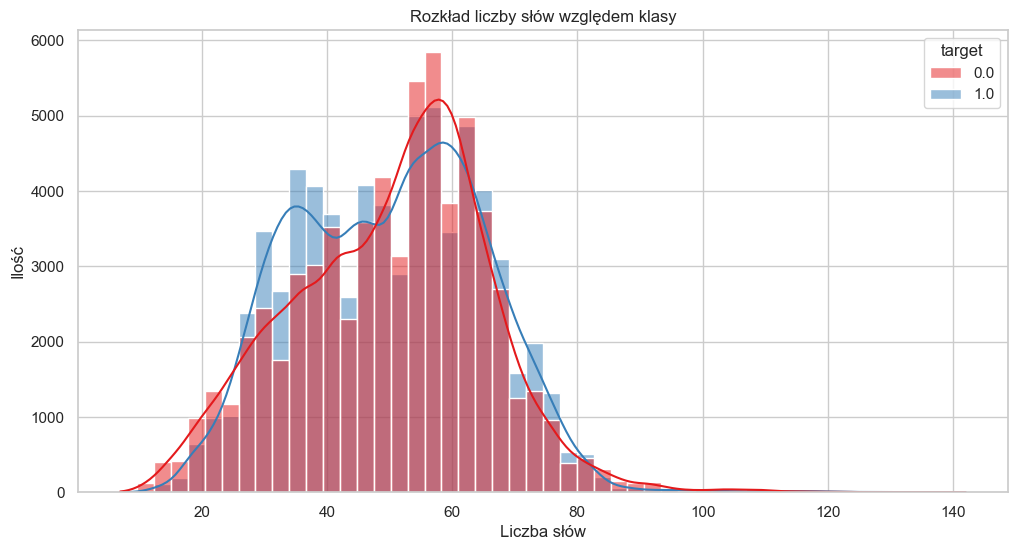

In [100]:
sns.histplot(data=df, x='word_count', hue='target', bins=50, kde=True)
plt.title('Rozkład liczby słów względem klasy')
plt.xlabel('Liczba słów')
plt.ylabel('Ilość')
plt.show()

## 3. Analiza Czasu

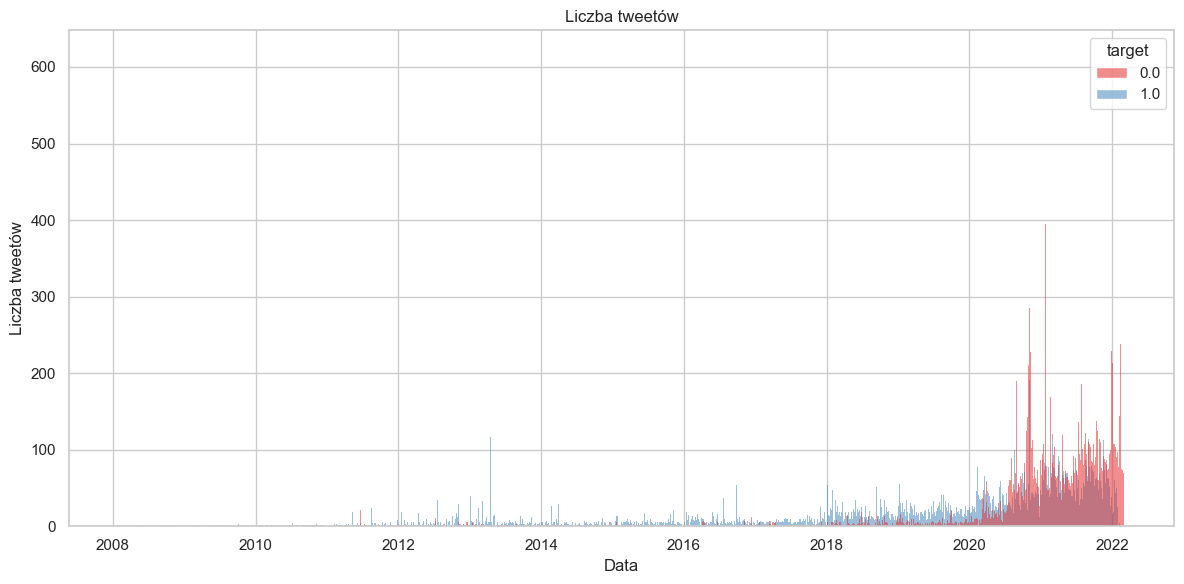

In [101]:
sns.histplot(data=df, x='date', hue='target', bins=100)
plt.title('Liczba tweetów')
plt.xlabel('Data')
plt.ylabel('Liczba tweetów')
plt.tight_layout()
plt.show()


In [102]:
df[['month','target']].groupby(by='month').mean()

,target
month,
1,0.425479
2,0.488144
3,0.624567
4,0.615791
5,0.632670
6,0.605564
7,0.504893
8,0.496951
9,0.531537


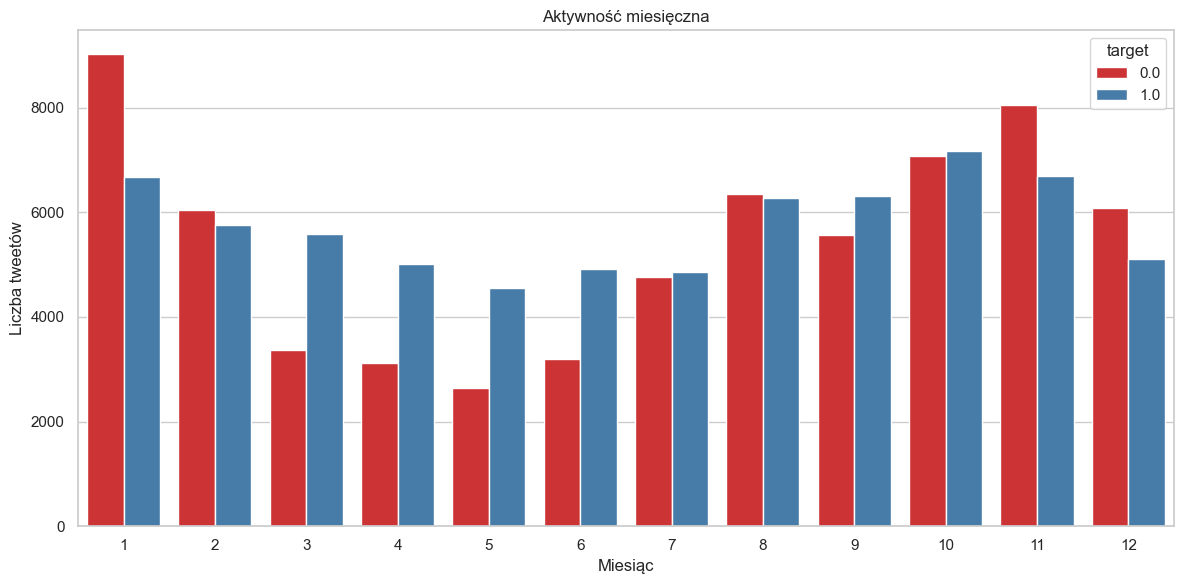

In [103]:
sns.countplot(data=df, x='month', hue='target')
plt.title('Aktywność miesięczna')
plt.xlabel('Miesiąc')
plt.ylabel('Liczba tweetów')
plt.tight_layout()
plt.show()

In [104]:
df[['weekday','target']].groupby(by='weekday').mean()

,target
weekday,
0,0.500969
1,0.532125
2,0.555454
3,0.515488
4,0.508729
5,0.479052
6,0.482572


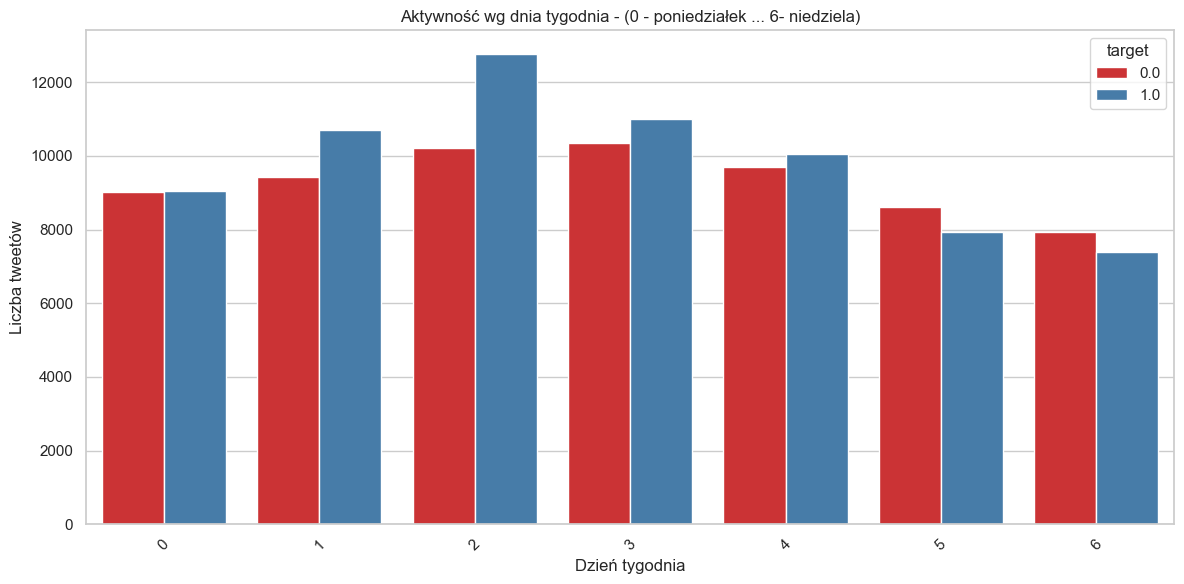

In [105]:
sns.countplot(data=df, x='weekday', hue = 'target')
plt.title('Aktywność wg dnia tygodnia - (0 - poniedziałek ... 6- niedziela)' )
plt.xlabel('Dzień tygodnia')
plt.ylabel('Liczba tweetów')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 4. Najczęsciej występujące słowa słowa

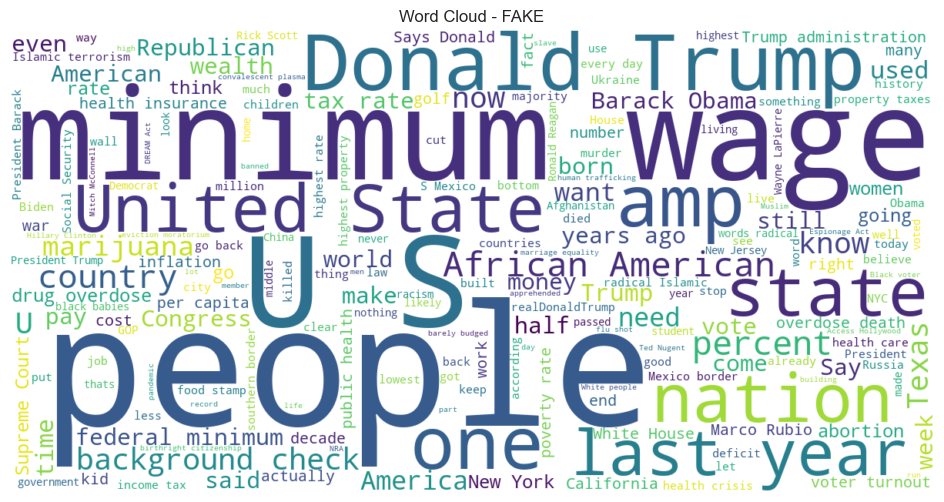

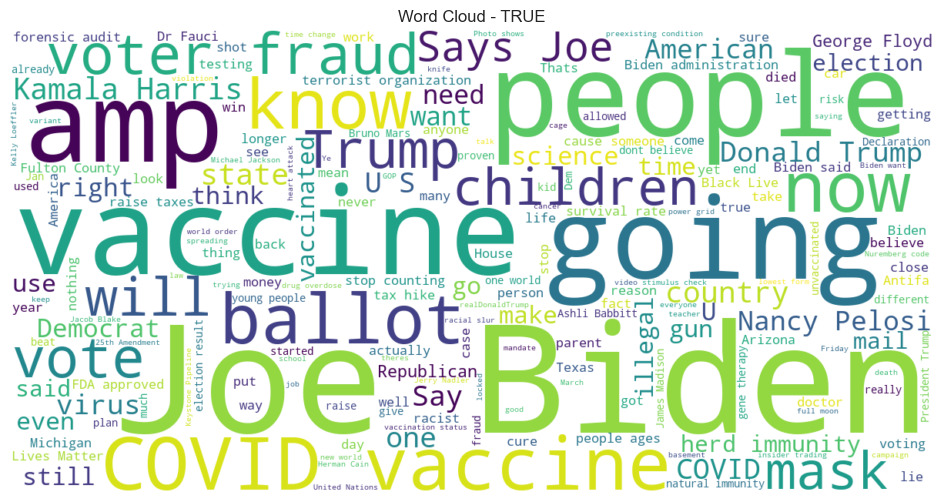

In [112]:
text_fake = ''.join(df[df['target'] == 1]['full_text'])
text_true = ''.join(df[df['target'] == 0]['full_text'])
wordcloud_fake = WordCloud(width=1200, height=600, background_color='white').generate(text_fake)
wordcloud_true = WordCloud(width=1200, height=600, background_color='white').generate(text_true)

plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - FAKE')
plt.show()

plt.imshow(wordcloud_true, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - TRUE')
plt.show()

# Export

In [113]:
df.head()

,author,statement,target,BinaryNumTarget,manual_keywords,tweet,5_label_majority_answer,3_label_majority_answer,full_text,word_count,date,month,weekday
0,D.L. Davis,End of eviction moratorium means millions of A...,1.0,1.0,"Americans, eviction moratorium",@POTUS Biden Blunders - 6 Month Update\n\nInfl...,Mostly Agree,Agree,End of eviction moratorium means millions of A...,58,2021-09-09,9,3
1,D.L. Davis,End of eviction moratorium means millions of A...,1.0,1.0,"Americans, eviction moratorium",@S0SickRick @Stairmaster_ @6d6f636869 Not as m...,NO MAJORITY,Agree,End of eviction moratorium means millions of A...,62,2021-08-30,8,0
2,D.L. Davis,End of eviction moratorium means millions of A...,1.0,1.0,"Americans, eviction moratorium",THE SUPREME COURT is siding with super rich pr...,Agree,Agree,End of eviction moratorium means millions of A...,53,2021-08-27,8,4
3,D.L. Davis,End of eviction moratorium means millions of A...,1.0,1.0,"Americans, eviction moratorium",@POTUS Biden Blunders\n\nBroken campaign promi...,Mostly Agree,Agree,End of eviction moratorium means millions of A...,55,2021-10-05,10,1
4,D.L. Davis,End of eviction moratorium means millions of A...,1.0,1.0,"Americans, eviction moratorium",@OhComfy I agree. The confluence of events rig...,Agree,Agree,End of eviction moratorium means millions of A...,53,2021-08-27,8,4


In [115]:
df_ready = df[['statement','tweet','target']]
df_ready.head()

,statement,tweet,target
0,End of eviction moratorium means millions of A...,@POTUS Biden Blunders - 6 Month Update\n\nInfl...,1.0
1,End of eviction moratorium means millions of A...,@S0SickRick @Stairmaster_ @6d6f636869 Not as m...,1.0
2,End of eviction moratorium means millions of A...,THE SUPREME COURT is siding with super rich pr...,1.0
3,End of eviction moratorium means millions of A...,@POTUS Biden Blunders\n\nBroken campaign promi...,1.0
4,End of eviction moratorium means millions of A...,@OhComfy I agree. The confluence of events rig...,1.0


In [116]:
df_ready.to_csv('../../data/new_data/processed/ready_data.csv',index=False)
print("Pomyślnie zapisano dane")

Pomyślnie zapisano dane
